In [6]:
import sys
sys.path.insert(0,'src')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from util import BLUE,RED,neat_plot
print('loaded')

loaded


In [7]:
data = pd.read_csv('data/GARDN_toehold_processed_data.csv')
print(data['Name'])

0                      GARDN_0
1                      GARDN_1
2                      GARDN_2
3                      GARDN_3
4                      GARDN_4
5                      GARDN_5
6                     ON_6_pre
7                    ON_6_post
8                     ON_7_pre
9                    ON_7_post
10                    ON_8_pre
11                   ON_8_post
12                    ON_9_pre
13                   ON_9_post
14                   ON_10_pre
15                  ON_10_post
16                   ON_11_pre
17                  ON_11_post
18               ON_OFF_12_pre
19              ON_OFF_12_post
20               ON_OFF_13_pre
21              ON_OFF_13_post
22               ON_OFF_14_pre
23              ON_OFF_14_post
24               ON_OFF_15_pre
25              ON_OFF_15_post
26               ON_OFF_16_pre
27              ON_OFF_16_post
28               ON_OFF_17_pre
29              ON_OFF_17_post
30                    NUPACK_0
31                    NUPACK_1
32      

In [8]:
data

,Name,ON,Unnamed: 2,Unnamed: 3,OFF,Unnamed: 5,Unnamed: 6,Avg. ON,Avg. OFF,ON/OFF Ratio,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,GARDN_0,272.0,288.0,284.0,23.8,27.8,30.2,281.3,27.3,10.3,NaN,NaN,NaN,NaN,NaN
1,GARDN_1,224.0,475.0,589.0,27.0,29.2,30.5,429.3,28.9,14.9,NaN,NaN,NaN,NaN,NaN
2,GARDN_2,404.0,475.0,471.0,27.4,29.2,29.8,450.0,28.8,15.6,NaN,NaN,NaN,NaN,NaN
3,GARDN_3,556.0,546.0,589.0,29.2,29.6,30.5,563.7,29.8,18.9,NaN,NaN,NaN,NaN,NaN
4,GARDN_4,230.0,299.0,228.0,27.8,28.9,30.5,252.3,29.1,8.7,NaN,NaN,NaN,NaN,NaN
5,GARDN_5,398.0,436.0,475.0,27.5,30.9,30.1,436.3,29.5,14.8,NaN,NaN,NaN,NaN,NaN
6,ON_6_pre,208.0,204.0,214.0,29.8,31.8,32.1,208.7,31.2,6.7,NaN,NaN,NaN,NaN,NaN
7,ON_6_post,320.0,319.0,382.0,29.3,31.6,31.9,340.3,30.9,11.0,NaN,NaN,NaN,NaN,NaN
8,ON_7_pre,252.0,261.0,270.0,32.8,30.7,31.4,261.0,31.6,8.3,NaN,NaN,NaN,NaN,NaN
9,ON_7_post,712.0,836.0,1051.0,33.1,32.9,34.0,866.3,33.3,26.0,NaN,NaN,NaN,NaN,NaN


In [9]:
#ON State optimization only 
ON = data.iloc[6:18,:]
GARDN = data.iloc[:6]
pre_idx = []
post_idx = []

for i,name in enumerate(ON['Name']):
    if 'pre' in name:
        pre_idx.append(i)
    else:
        post_idx.append(i)
        
        
        
pre = ON.iloc[pre_idx,:]
post = ON.iloc[post_idx,:]

4.1991253245865785


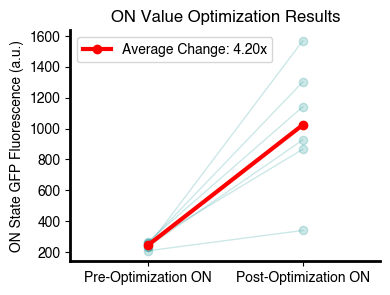

In [10]:
tick_1 = 0.25
tick_2 = 0.75
ggplot_styles = {
'font.family': 'Helvetica',
'font.size':12}

plt.rcParams.update(ggplot_styles)


pre_mean = np.mean(pre['Avg. ON'])
post_mean = np.mean(post['Avg. ON'])
print(post_mean/pre_mean)

plt.figure(figsize=(4,3))
plt.rcParams.update({'font.size': 10,'font.family':'Helvetica'})
plt.xticks(ticks=[tick_1,tick_2], labels=['Pre-Optimization ON','Post-Optimization ON'])
plt.subplot().spines['right'].set_visible(False)
plt.subplot().spines['top'].set_visible(False)
plt.subplot().spines['left'].set_linewidth(2.0)
plt.subplot().spines['bottom'].set_linewidth(2.0)
plt.ylabel('ON State GFP Fluorescence (a.u.)')
plt.xlim([0,1])
plt.title('ON Value Optimization Results')
for i in range(pre.shape[0]):
    plt.plot([tick_1,tick_2],[pre.iloc[i,:]['Avg. ON'],post.iloc[i,:]['Avg. ON']],color='darkcyan',alpha=0.2,marker='o',linewidth=1)
    
plt.plot([tick_1,tick_2],[pre_mean,post_mean],color='red',alpha=1,marker='o',linewidth=3,label='Average Change: %.2fx'%(post_mean/pre_mean))
plt.legend()
# plt.savefig('ON_opt.svg')

In [11]:
#ON/OFF State optimization only 
ON_OFF = data.iloc[18:-8,:]
print(ON_OFF)
pre_idx_on_off = []
post_idx_on_off = []

for i,name in enumerate(ON_OFF['Name']):
    if 'pre' in name:
        pre_idx_on_off.append(i)
    else:
        post_idx_on_off.append(i)
        
        
        
pre_on_off = ON_OFF.iloc[pre_idx_on_off,:]
post_on_off = ON_OFF.iloc[post_idx_on_off,:]

              Name      ON  Unnamed: 2  Unnamed: 3   OFF  Unnamed: 5  \
18   ON_OFF_12_pre   242.0       261.0       223.0  33.4        32.2   
19  ON_OFF_12_post  2060.0      2788.0      2105.0  31.6        31.2   
20   ON_OFF_13_pre   541.0       640.0       642.0  74.1        72.9   
21  ON_OFF_13_post  1137.0       977.0      1080.0  34.1        36.0   
22   ON_OFF_14_pre   422.0       703.0       426.0  35.5        34.0   
23  ON_OFF_14_post  1806.0      1656.0      1658.0  36.2        36.6   
24   ON_OFF_15_pre   303.0       333.0       399.0  35.2        34.9   
25  ON_OFF_15_post  2703.0      2680.0      2666.0  34.3        34.6   
26   ON_OFF_16_pre   278.0       337.0       225.0  54.9        54.7   
27  ON_OFF_16_post   340.0       258.0       362.0  36.4        34.9   
28   ON_OFF_17_pre   702.0       637.0       482.0  35.6        36.6   
29  ON_OFF_17_post   958.0      1025.0       933.0  40.1        39.9   

    Unnamed: 6  Avg. ON  Avg. OFF  ON/OFF Ratio  Unnamed: 10  U

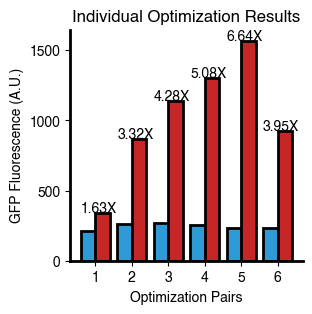

In [13]:
tick_1 = 0.2
tick_2 = 0.6
TARGET='Avg. ON'

plt.figure(figsize=(3,3))
plt.title('Individual Optimization Results')
plt.ylabel('GFP Fluorescence (A.U.)')

plt.xticks(np.arange(0,pre.shape[0])+0.4,labels=[1,2,3,4,5,6])

for j in range(pre.shape[0]):
    plt.bar([j + tick_1, j + tick_2],[pre.iloc[j,:][TARGET],post.iloc[j,:][TARGET]],color=[BLUE,RED],alpha=1,width=0.4,edgecolor='black',linewidth=2)
    plt.text(x=j, y=max(post.iloc[j,:][TARGET],pre.iloc[j,:][TARGET])+5,s='%.2fX'%(post.iloc[j,:][TARGET]/pre.iloc[j,:][TARGET]))

# plt.plot([tick_1,tick_2],[pre_mean,post_mean],color='red',alpha=1,marker='o',linewidth=3,label='Average Change: %.2f'%(post_mean/pre_mean))
# legend = plt.legend(['Pre-Optimization ON/OFF','Post-Optimization ON/OFF'],loc='center')
# legend.legendHandles[0].set_color(util.RED)
# legend.legendHandles[1].set_color(util.BLUE)
# legend.legendHandles[0].set_edgecolor('black')
# legend.legendHandles[1].set_edgecolor('black')
plt.xlabel('Optimization Pairs')
neat_plot()
# plt.savefig('figures/GARDN_toehold_ON_individual.svg',transparent=True)


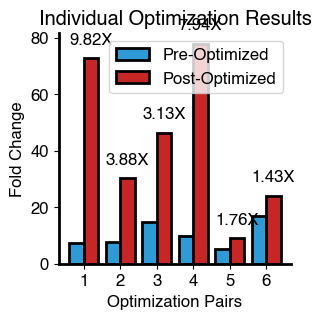

In [14]:
tick_1 = 0.2
tick_2 = 0.6
TARGET='ON/OFF Ratio'

plt.figure(figsize=(3,3))
plt.title('Individual Optimization Results')
plt.ylabel('Fold Change')

plt.xticks(np.arange(0,pre.shape[0])+0.4,labels=[1,2,3,4,5,6])

for j in range(pre_on_off.shape[0]):
    plt.bar([j + tick_1, j + tick_2],[pre_on_off.iloc[j,:][TARGET],post_on_off.iloc[j,:][TARGET]],color=[BLUE,RED],alpha=1,width=0.4,edgecolor='black',linewidth=2)
    plt.text(x=j, y=max(post_on_off.iloc[j,:][TARGET],pre_on_off.iloc[j,:][TARGET])+5,s='%.2fX'%(post_on_off.iloc[j,:][TARGET]/pre_on_off.iloc[j,:][TARGET]))

# plt.plot([tick_1,tick_2],[pre_mean,post_mean],color='red',alpha=1,marker='o',linewidth=3,label='Average Change: %.2f'%(post_mean/pre_mean))
# legend = plt.legend(['Pre-Optimization ON/OFF','Post-Optimization ON/OFF'],loc='center')
# legend.legendHandles[0].set_color(util.RED)
# legend.legendHandles[1].set_color(util.BLUE)
# legend.legendHandles[0].set_edgecolor('black')
# legend.legendHandles[1].set_edgecolor('black')
plt.xlabel('Optimization Pairs')
legend = plt.legend(['Pre-Optimized','Post-Optimized'])
colors=[BLUE,RED]
for z,handle in enumerate(legend.legendHandles):
    handle.set_facecolor(colors[z])
neat_plot()
# plt.savefig('figures/GARDN_toehold_ON_OFF_individual.svg',transparent=True)

In [10]:
post_mean

1024.1666666666665

In [11]:
pre_mean

243.9

In [12]:
nupack = data.iloc[-8:-2,:]

In [13]:
nupack

,Name,ON,Unnamed: 2,Unnamed: 3,OFF,Unnamed: 5,Unnamed: 6,Avg. ON,Avg. OFF,ON/OFF Ratio,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
30,NUPACK_0,144.0,132.0,134.0,30.6,32.0,32.3,136.7,31.6,4.3,NaN,NaN,NaN,NaN,NaN
31,NUPACK_1,94.0,117.0,128.0,33.1,34.0,33.0,113.0,33.4,3.4,NaN,NaN,NaN,NaN,NaN
32,NUPACK_2,393.0,329.0,322.0,314.0,327.0,351.0,348.0,330.7,1.1,NaN,NaN,NaN,NaN,NaN
33,NUPACK_3,172.0,208.0,157.0,51.3,71.3,62.3,179.0,61.6,2.9,NaN,NaN,NaN,NaN,NaN
34,NUPACK_4,283.0,246.0,230.0,33.9,33.4,36.1,253.0,34.5,7.3,NaN,NaN,NaN,NaN,NaN
35,NUPACK_5,225.0,233.0,216.0,72.2,82.1,76.7,224.7,77.0,2.9,NaN,NaN,NaN,NaN,NaN


In [14]:
print(np.mean(nupack['Avg. ON'] / nupack['Avg. OFF']))

3.6531425803755884


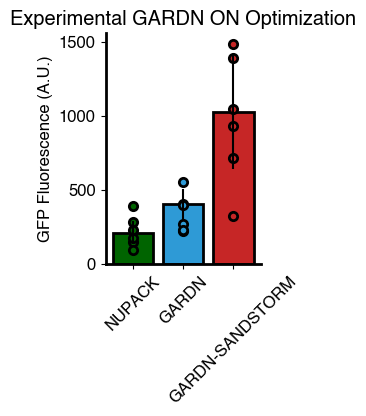

In [15]:
from util import BLUE,RED
plt.figure(figsize=[2,3])
plt.bar(1,np.mean(nupack['Avg. ON']),edgecolor='black',linewidth=2,color='darkgreen',yerr=np.std(nupack['Avg. ON']))
plt.bar(2,np.mean(GARDN['Avg. ON']),edgecolor='black',linewidth=2,color=BLUE,yerr=np.std(GARDN['Avg. ON']))
plt.bar(3,np.mean(post['Avg. ON']),edgecolor='black',linewidth=2,color=RED,yerr=np.std(post['Avg. ON']))


plt.scatter([1 for i in range(6)],nupack['ON'],color='darkgreen',edgecolor='black',linewidth=2)
plt.scatter([2 for i in range(6)],GARDN['ON'],color=BLUE,edgecolor='black',linewidth=2)
plt.scatter([3 for i in range(6)],post['ON'],color=RED,edgecolor='black',linewidth=2)
plt.xticks([1,2,3],labels=['NUPACK','GARDN','GARDN-SANDSTORM'],rotation=45)

plt.title('Experimental GARDN ON Optimization')
plt.ylabel('GFP Fluorescence (A.U.)')
neat_plot()
plt.savefig('figures/GARDN_toehold_ON.svg',transparent=True)

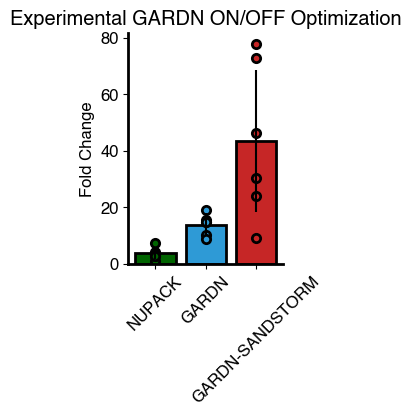

In [16]:
from util import BLUE,RED
plt.figure(figsize=[2,3])
plt.bar(1,np.mean(nupack['ON/OFF Ratio']),edgecolor='black',linewidth=2,color='darkgreen',yerr=np.std(nupack['ON/OFF Ratio']))
plt.bar(2,np.mean(GARDN['ON/OFF Ratio']),edgecolor='black',linewidth=2,color=BLUE,yerr=np.std(pre_on_off['ON/OFF Ratio']))
plt.bar(3,np.mean(post_on_off['ON/OFF Ratio']),edgecolor='black',linewidth=2,color=RED,yerr=np.std(post_on_off['ON/OFF Ratio']))

plt.scatter([1 for i in range(6)],nupack['ON/OFF Ratio'],color='darkgreen',edgecolor='black',linewidth=2)
plt.scatter([2 for i in range(6)],GARDN['ON/OFF Ratio'],color=BLUE,edgecolor='black',linewidth=2)
plt.scatter([3 for i in range(6)],post_on_off['ON/OFF Ratio'],color=RED,edgecolor='black',linewidth=2)

plt.title('Experimental GARDN ON/OFF Optimization')
plt.xticks([1,2,3],labels=['NUPACK','GARDN','GARDN-SANDSTORM'],rotation=45)
plt.ylabel('Fold Change')


neat_plot()
# plt.savefig('figures/GARDN_toehold_ON_OFF.svg',transparent=True)

In [26]:
z_on = GARDN['Avg. ON'].values

a = pre['Avg. ON'].values

b = post['Avg. ON'].values

c = nupack['Avg. ON'].values

In [27]:
print('GARDN vs. NUPACK')
print(np.power(np.prod(z_on/c),(1/6)))
print(np.mean(z_on) / np.mean(c))
#independent
print(mannwhitneyu(c,z_on,alternative='less'))
print('\n')

#independent
print('GARDN ON optimized vs NUPACK')
print(np.power(np.prod(b/c),(1/6)))
print(np.mean(b) / np.mean(c))
print(mannwhitneyu(c,b,alternative='less'))
print('\n')

#paired
print('GARDN ON Pre vs. Post')
print(np.power(np.prod(b/a),(1/6)))
print(wilcoxon(a,b,alternative='less'))
print('\n')


GARDN vs. NUPACK
1.987536597863967
1.923549107142857
MannwhitneyuResult(statistic=3.0, pvalue=0.007575757575757576)


GARDN ON optimized vs NUPACK
4.760503291451962
4.8987563775510194
MannwhitneyuResult(statistic=1.0, pvalue=0.0021645021645021645)


GARDN ON Pre vs. Post
3.8158053808542305
WilcoxonResult(statistic=0.0, pvalue=0.015625)




In [28]:
#Generative model vs NUPACK

x = nupack['ON/OFF Ratio'].values

w = pre_on_off['ON/OFF Ratio'].values

y = post_on_off['ON/OFF Ratio'].values


z_on_off = GARDN['ON/OFF Ratio'].values

In [29]:
from scipy.stats import ttest_ind,wilcoxon,mannwhitneyu

#independent
print('GARDN vs. NUPACK')
print('Geometric',np.power(np.prod(z_on_off/x),(1/6)))
print('Arithmetic',np.mean(z_on_off) / np.mean(x))
print(mannwhitneyu(x,z_on_off,alternative='less'))
print('\n')

#independent
print('GARDN ON/OFF Optimized vs NUPACK')
print(np.power(np.prod(y/x),(1/6)))
print(np.mean(y) / np.mean(x))
print(mannwhitneyu(x,y,alternative='less'))
print('\n')

#paired
print('GARDN ON/OFF Pre vs. Post')
print(np.power(np.prod(y/w),(1/6)))
print(wilcoxon(w,y,alternative='less'))

GARDN vs. NUPACK
Geometric 4.250976051643508
Arithmetic 3.799086757990868
MannwhitneyuResult(statistic=0.0, pvalue=0.0024990623825412285)


GARDN ON/OFF Optimized vs NUPACK
10.970414683301401
11.881278538812788
MannwhitneyuResult(statistic=0.0, pvalue=0.0024990623825412285)


GARDN ON/OFF Pre vs. Post
3.6589005158562036
WilcoxonResult(statistic=0.0, pvalue=0.015625)
